In [1]:
import pandas as pd
from mrmr import mrmr_classif
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('telco_200.csv')
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Married,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,6682-VCIXC,Yes,2,43,Offer B,No,0.00,No,Yes,DSL,...,0.0,0.00,Female,61,Yes,0,0,5656,1,0
1,4475-NVTLU,Yes,6,45,Offer B,Yes,17.23,No,No,NaN,...,0.0,775.35,Male,21,Yes,1,0,3451,1,0
2,6999-CHVCF,No,0,68,NaN,Yes,49.42,Yes,Yes,DSL,...,0.0,3360.56,Male,40,No,0,0,5228,0,0
3,5832-EXGTT,Yes,9,29,NaN,Yes,1.41,No,Yes,DSL,...,0.0,40.89,Male,28,Yes,3,0,5517,2,0
4,4531-AUZNK,Yes,2,51,Offer B,Yes,18.42,Yes,Yes,Fiber Optic,...,2350.0,939.42,Female,21,Yes,1,0,6492,1,0


Preproccesing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        200 non-null    object 
 1   Referred a Friend                  200 non-null    object 
 2   Number of Referrals                200 non-null    int64  
 3   Tenure in Months                   200 non-null    int64  
 4   Offer                              73 non-null     object 
 5   Phone Service                      200 non-null    object 
 6   Avg Monthly Long Distance Charges  200 non-null    float64
 7   Multiple Lines                     200 non-null    object 
 8   Internet Service                   200 non-null    object 
 9   Internet Type                      150 non-null    object 
 10  Avg Monthly GB Download            200 non-null    int64  
 11  Online Security                    200 non-null    object 

In [4]:
df.isnull().sum()

Customer ID                            0
Referred a Friend                      0
Number of Referrals                    0
Tenure in Months                       0
Offer                                127
Phone Service                          0
Avg Monthly Long Distance Charges      0
Multiple Lines                         0
Internet Service                       0
Internet Type                         50
Avg Monthly GB Download                0
Online Security                        0
Online Backup                          0
Device Protection Plan                 0
Premium Tech Support                   0
Streaming TV                           0
Streaming Movies                       0
Streaming Music                        0
Unlimited Data                         0
Contract                               0
Paperless Billing                      0
Payment Method                         0
Monthly Charge                         0
Total Regular Charges                  0
Total Refunds   

In [5]:
df.drop('Customer ID',axis=1,inplace=True)

In [6]:
# define X, y
X=df.drop('Churn Value',axis=1)
y=df['Churn Value']

In [7]:
X

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Married,Number of Dependents,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,Yes,2,43,Offer B,No,0.00,No,Yes,DSL,6,...,0.0,0.0,0.00,Female,61,Yes,0,5656,1,0
1,Yes,6,45,Offer B,Yes,17.23,No,No,NaN,0,...,0.0,0.0,775.35,Male,21,Yes,1,3451,1,0
2,No,0,68,NaN,Yes,49.42,Yes,Yes,DSL,7,...,0.0,0.0,3360.56,Male,40,No,0,5228,0,0
3,Yes,9,29,NaN,Yes,1.41,No,Yes,DSL,73,...,0.0,0.0,40.89,Male,28,Yes,3,5517,2,0
4,Yes,2,51,Offer B,Yes,18.42,Yes,Yes,Fiber Optic,47,...,0.0,2350.0,939.42,Female,21,Yes,1,6492,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,No,0,47,Offer B,Yes,36.78,No,Yes,DSL,25,...,0.0,0.0,1728.66,Male,33,No,0,5631,1,1
196,No,0,39,NaN,Yes,35.13,No,Yes,Fiber Optic,29,...,0.0,934.0,1370.07,Male,47,No,0,3446,0,0
197,No,0,4,Offer E,Yes,12.24,Yes,Yes,DSL,12,...,0.0,44.0,48.96,Male,42,No,0,3212,1,0
198,No,0,4,NaN,No,0.00,No,Yes,Fiber Optic,13,...,0.0,21.0,0.00,Male,33,No,0,2664,0,0


In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df["Internet Type"].unique()

array(['DSL', nan, 'Fiber Optic', 'Cable'], dtype=object)

In [11]:
X.replace(to_replace=['No', 'Yes'], value = [0,1], inplace = True)
X.replace(to_replace=['Female', 'Male'], value = [0,1], inplace = True)

In [12]:
X.head(4)

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Married,Number of Dependents,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,1,2,43,Offer B,0,0.00,0,1,DSL,6,...,0.0,0.0,0.00,0,61,1,0,5656,1,0
1,1,6,45,Offer B,1,17.23,0,0,NaN,0,...,0.0,0.0,775.35,1,21,1,1,3451,1,0
2,0,0,68,NaN,1,49.42,1,1,DSL,7,...,0.0,0.0,3360.56,1,40,0,0,5228,0,0
3,1,9,29,NaN,1,1.41,0,1,DSL,73,...,0.0,0.0,40.89,1,28,1,3,5517,2,0


In [13]:
X = pd.get_dummies(X)
X.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,1,2,43,0,0.00,0,1,6,1,1,...,False,False,True,False,False,True,False,True,False,False
1,1,6,45,1,17.23,0,0,0,0,0,...,False,False,False,False,False,False,True,True,False,False
2,0,0,68,1,49.42,1,1,7,1,1,...,False,False,True,False,False,False,True,True,False,False
3,1,9,29,1,1.41,0,1,73,1,0,...,False,False,True,False,True,False,False,False,True,False
4,1,2,51,1,18.42,1,1,47,1,0,...,False,False,False,True,False,True,False,False,False,True


In [14]:
#check if the dataset is imbalanced
y.value_counts()

Churn Value
0    146
1     54
Name: count, dtype: int64

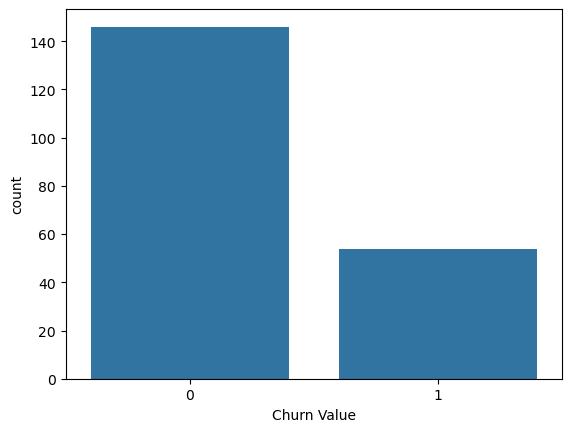

In [15]:
sns.countplot(x=y)
None

Train model without fixing imbalance

In [16]:
#Split Train_Test
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=5)

#fit the model
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train,y_train)

#predict
pred = classifier_rf.predict(X_test)
#print results
print("RMSE is: ", mean_squared_error(y_test,pred, squared=False))

RMSE is:  0.4


Feature Selection with
Maximum Relevance - Minimum Relevance
(MRMR)

In [17]:
#run mrmr on all dataset (split into X and y)
mrmr_classif(X,y,K=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

100%|██████████| 15/15 [00:00<00:00, 29.96it/s]


In [18]:
#run mrmr on train set
mrmr_classif(X_train,y_train,K=15)

100%|██████████| 15/15 [00:00<00:00, 34.03it/s]


['Total Customer Svc Requests',
 'Internet Type_Cable',
 'Contract_Month-to-Month',
 'Product/Service Issues Reported',
 'Payment Method_Credit Card',
 'Number of Referrals',
 'Monthly Charge',
 'Payment Method_Mailed Check',
 'Contract_One Year',
 'Offer_Offer B',
 'Internet Service',
 'Tenure in Months',
 'Contract_Two Year',
 'Total Extra Data Charges',
 'Paperless Billing']

In [19]:
#Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_sc = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_sc = scaler.transform(X_test)

In [20]:
#Make the X_train_sc into a df

X_train_sc_df = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_train_sc_df

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.960769,-0.434169,1.735943,0.357519,1.124624,1.314257,0.572218,0.268409,1.779513,1.603567,...,-0.237356,1.959263,-0.561951,-0.665062,-1.013423,-0.541390,1.658312,0.874475,-0.750000,-0.281312
1,-1.040833,-0.739922,-1.299321,0.357519,0.030704,-0.760886,0.572218,-0.480872,-0.561951,1.603567,...,-0.237356,1.959263,-0.561951,-0.665062,0.986754,-0.541390,-0.603023,0.874475,-0.750000,-0.281312
2,0.960769,-0.434169,0.282436,0.357519,0.040059,-0.760886,0.572218,2.716063,1.779513,-0.623610,...,-0.237356,-0.510396,-0.561951,1.503619,-1.013423,-0.541390,1.658312,-1.143544,1.333333,-0.281312
3,-1.040833,-0.739922,-0.444317,0.357519,0.056097,-0.760886,-1.747585,-0.930441,-0.561951,-0.623610,...,-0.237356,-0.510396,-0.561951,-0.665062,-1.013423,-0.541390,1.658312,-1.143544,1.333333,-0.281312
4,-1.040833,-0.739922,1.137440,0.357519,-1.274383,1.314257,-1.747585,-0.930441,-0.561951,-0.623610,...,-0.237356,-0.510396,-0.561951,-0.665062,-1.013423,-0.541390,1.658312,-1.143544,1.333333,-0.281312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.960769,-0.434169,0.154186,0.357519,0.255235,1.314257,0.572218,3.565249,1.779513,-0.623610,...,-0.237356,-0.510396,1.779513,-0.665062,0.986754,-0.541390,-0.603023,0.874475,-0.750000,-0.281312
146,-1.040833,-0.739922,1.522192,0.357519,0.743723,-0.760886,0.572218,-0.530824,-0.561951,-0.623610,...,-0.237356,-0.510396,1.779513,-0.665062,-1.013423,-0.541390,1.658312,0.874475,-0.750000,-0.281312
147,-1.040833,-0.739922,0.111436,0.357519,-0.065524,1.314257,-1.747585,-0.930441,-0.561951,-0.623610,...,-0.237356,-0.510396,-0.561951,-0.665062,-1.013423,-0.541390,1.658312,0.874475,-0.750000,-0.281312
148,-1.040833,-0.739922,0.325186,0.357519,0.914126,-0.760886,0.572218,0.518170,-0.561951,-0.623610,...,-0.237356,-0.510396,-0.561951,1.503619,-1.013423,1.847096,-0.603023,0.874475,-0.750000,-0.281312


In [21]:
#Make the X_test_sc into a df

X_test_sc_df = pd.DataFrame(X_test_sc, columns = X_test.columns)
X_test_sc_df

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.960769,0.788842,1.308441,0.357519,1.376553,-0.760886,0.572218,0.068601,1.779513,-0.623610,...,-0.237356,-0.510396,-0.561951,1.503619,-1.013423,1.847096,-0.603023,0.874475,-0.750000,-0.281312
1,0.960769,2.011853,0.410687,0.357519,-0.869425,-0.760886,-1.747585,-0.930441,-0.561951,-0.623610,...,-0.237356,-0.510396,-0.561951,-0.665062,-1.013423,-0.541390,1.658312,-1.143544,1.333333,-0.281312
2,-1.040833,-0.739922,-1.299321,0.357519,-1.075245,-0.760886,-1.747585,-0.930441,-0.561951,-0.623610,...,4.213075,-0.510396,-0.561951,-0.665062,0.986754,-0.541390,-0.603023,-1.143544,1.333333,-0.281312
3,-1.040833,-0.739922,0.923689,0.357519,-1.111330,-0.760886,0.572218,0.268409,-0.561951,-0.623610,...,-0.237356,-0.510396,1.779513,-0.665062,-1.013423,1.847096,-0.603023,0.874475,-0.750000,-0.281312
4,-1.040833,-0.739922,0.667188,0.357519,1.024387,-0.760886,0.572218,0.318361,1.779513,1.603567,...,-0.237356,-0.510396,1.779513,-0.665062,-1.013423,1.847096,-0.603023,0.874475,-0.750000,-0.281312
5,-1.040833,-0.739922,1.564942,0.357519,1.869051,1.314257,0.572218,-0.580777,1.779513,1.603567,...,-0.237356,-0.510396,1.779513,-0.665062,-1.013423,-0.541390,1.658312,0.874475,-0.750000,-0.281312
6,0.960769,-0.434169,-0.658068,0.357519,0.686922,-0.760886,0.572218,0.468218,-0.561951,1.603567,...,-0.237356,-0.510396,1.779513,-0.665062,0.986754,-0.541390,-0.603023,-1.143544,1.333333,-0.281312
7,0.960769,0.788842,1.009190,0.357519,0.785823,-0.760886,0.572218,-0.730633,-0.561951,-0.623610,...,-0.237356,1.959263,-0.561951,-0.665062,-1.013423,-0.541390,1.658312,-1.143544,1.333333,-0.281312
8,0.960769,0.177337,-0.273316,0.357519,-1.244980,-0.760886,-1.747585,-0.930441,-0.561951,-0.623610,...,-0.237356,-0.510396,-0.561951,-0.665062,-1.013423,-0.541390,1.658312,-1.143544,1.333333,-0.281312
9,-1.040833,-0.739922,-0.786319,-2.797057,-1.433426,-0.760886,0.572218,0.468218,-0.561951,1.603567,...,-0.237356,-0.510396,-0.561951,1.503619,0.986754,-0.541390,-0.603023,0.874475,-0.750000,-0.281312


In [22]:
mrmr_classif(X_train_sc_df, y_train.values, K=10)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 34.88it/s]


['Total Customer Svc Requests',
 'Internet Type_Cable',
 'Contract_Month-to-Month',
 'Product/Service Issues Reported',
 'Payment Method_Credit Card',
 'Number of Referrals',
 'Monthly Charge',
 'Payment Method_Mailed Check',
 'Contract_One Year',
 'Offer_Offer B']

Select K Best

In [23]:
# Step 1: Feature selection with SelectKBest
#number of top features we want
k = 10  
select_k_best=SelectKBest(mutual_info_classif, k = k)
X_train_kbest = select_k_best.fit_transform(X_train_sc, y_train)
X_test_kbest = select_k_best.transform(X_test_sc)

model = RandomForestClassifier()
model.fit(X_train_kbest, y_train)
y_pred = model.predict(X_test_kbest)
mse = mean_squared_error(y_test, y_pred,squared=False)

print(f'RMSE using SelectKBest with {k} features: {mse}')

RMSE using SelectKBest with 10 features: 0.4242640687119285


In [24]:
features_names=X.columns
select_mask = select_k_best.get_support() 
selected_features_names = features_names[select_mask]

print("Selected features by SelectKBest:")
print(selected_features_names)

Selected features by SelectKBest:
Index(['Number of Referrals', 'Internet Service', 'Paperless Billing',
       'Monthly Charge', 'Total Extra Data Charges',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Internet Type_Cable', 'Contract_Month-to-Month',
       'Payment Method_Credit Card'],
      dtype='object')


MRMR

In [25]:
selected_features = mrmr_classif(X_train_sc_df, y_train.values, K=10)
selected_features

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 35.34it/s]


['Total Customer Svc Requests',
 'Internet Type_Cable',
 'Contract_Month-to-Month',
 'Product/Service Issues Reported',
 'Payment Method_Credit Card',
 'Number of Referrals',
 'Monthly Charge',
 'Payment Method_Mailed Check',
 'Contract_One Year',
 'Offer_Offer B']

In [26]:
X_train_mrmr = X_train_sc_df[selected_features]
X_test_mrmr = X_test_sc_df[selected_features]

model = RandomForestClassifier()
model.fit(X_train_mrmr, y_train)

y_pred = model.predict(X_test_mrmr)

rmse = mean_squared_error(y_test, y_pred,squared=False)

print(f"RMSE using MRMR with top 4 features: {rmse}")

RMSE using MRMR with top 4 features: 0.34641016151377546


In [27]:

#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5)
models={'Model':[],"F1_score":[]}
for classif in [RandomForestClassifier(),GradientBoostingClassifier(),LGBMClassifier(),XGBClassifier(),AdaBoostClassifier()]:
            pipe=Pipeline([
                ("classifier",classif)
            ])

            
            
            pipe.fit(X_train_mrmr,y_train)
            y_predict=pipe.predict(X_test_mrmr)
            models["Model"].append(str(classif))
            models["F1_score"].append(f1_score(y_test,y_predict,average='macro'))
            print(classif,"with score",f1_score(y_test,y_predict,average='macro'))

RandomForestClassifier() with score 0.8251748251748252
GradientBoostingClassifier() with score 0.8023715415019763
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 42, number of negative: 108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.280000 -> initscore=-0.944462
[LightGBM] [Info] Start training from score -0.944462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [28]:
pd.DataFrame(models)

,Model,F1_score
0,RandomForestClassifier(),0.825175
1,GradientBoostingClassifier(),0.802372
2,LGBMClassifier(),0.849307
3,"XGBClassifier(base_score=None, booster=None, c...",0.890351
4,AdaBoostClassifier(),0.849307


We can see that the best algorithm is XGBOOST  with f1 score : 0.890351

After choosing XGBoost, we use Grid-search to optimize hyper parameters

In [29]:
#we choose XGBOOST classifier
pipe=Pipeline([
    ("std_scaler",StandardScaler()),
    ("classifier",XGBClassifier())
])

parameters={"classifier__n_estimators":[2,3,4,5,6],
            "classifier__learning_rate":[1,2,3]}

CV=GridSearchCV(pipe,parameters,scoring="f1_macro",verbose=2)

CV.fit(X,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END classifier__learning_rate=1, classifier__n_estimators=2; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=2; total time=   0.0s


[CV] END classifier__learning_rate=1, classifier__n_estimators=2; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=2; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=2; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=3; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=3; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=3; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=3; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=3; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=4; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=4; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=4; total time=   0.0s
[CV] END classifier__learning_rate=1, classifier__n_estimators=4;

GridSearchCV(estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_t...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [1, 2, 3],
                         'classifier__n_estimators': [2, 3, 4, 5, 6]},
             scoring='f1_macro', verbose=2)

In [30]:
CV.cv_results_

{'mean_fit_time': array([0.01390939, 0.02521672, 0.01440191, 0.01408091, 0.01570258,
        0.0131041 , 0.01420403, 0.01410108, 0.01460204, 0.01576533,
        0.01350322, 0.01307621, 0.01289854, 0.01370277, 0.01560602]),
 'std_fit_time': array([0.00135115, 0.01594593, 0.00101815, 0.00110792, 0.00074688,
        0.00111327, 0.00098309, 0.00080311, 0.00049036, 0.00192816,
        0.00109718, 0.00075547, 0.00200964, 0.00203899, 0.00177189]),
 'mean_score_time': array([0.0067977 , 0.0079133 , 0.00570245, 0.00720139, 0.00650239,
        0.00619965, 0.00639949, 0.00620089, 0.00620046, 0.00710387,
        0.00700068, 0.00620008, 0.00620332, 0.00580125, 0.006601  ]),
 'std_score_time': array([0.00039753, 0.0009252 , 0.00124762, 0.00040069, 0.0008917 ,
        0.00116548, 0.00048933, 0.00039968, 0.00116755, 0.00048516,
        0.00063701, 0.00116545, 0.00116346, 0.00116758, 0.00049011]),
 'param_classifier__learning_rate': masked_array(data=[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
     

In [31]:
results=pd.DataFrame(CV.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013909,0.001351,0.006798,0.000398,1,2,"{'classifier__learning_rate': 1, 'classifier__...",0.713262,0.800000,0.725400,0.856631,0.903148,0.799688,0.073396,1
1,0.025217,0.015946,0.007913,0.000925,1,3,"{'classifier__learning_rate': 1, 'classifier__...",0.713262,0.749216,0.733333,0.738562,0.903148,0.767504,0.068820,7
2,0.014402,0.001018,0.005702,0.001248,1,4,"{'classifier__learning_rate': 1, 'classifier__...",0.784946,0.749216,0.758412,0.738562,0.866667,0.779561,0.046185,3
3,0.014081,0.001108,0.007201,0.000401,1,5,"{'classifier__learning_rate': 1, 'classifier__...",0.713262,0.827437,0.758412,0.713262,0.937304,0.789935,0.084706,2
4,0.015703,0.000747,0.006502,0.000892,1,6,"{'classifier__learning_rate': 1, 'classifier__...",0.713262,0.774011,0.758412,0.738562,0.903148,0.777479,0.066040,4
5,0.013104,0.001113,0.006200,0.001165,2,2,"{'classifier__learning_rate': 2, 'classifier__...",0.666667,0.800000,0.689387,0.664378,0.784946,0.721076,0.059140,12
6,0.014204,0.000983,0.006399,0.000489,2,3,"{'classifier__learning_rate': 2, 'classifier__...",0.664378,0.800000,0.689387,0.709443,0.784946,0.729631,0.053473,11
7,0.014101,0.000803,0.006201,0.000400,2,4,"{'classifier__learning_rate': 2, 'classifier__...",0.666667,0.811912,0.800000,0.733333,0.838579,0.770098,0.062261,5
8,0.014602,0.000490,0.006200,0.001168,2,5,"{'classifier__learning_rate': 2, 'classifier__...",0.644875,0.800000,0.774011,0.758412,0.866667,0.768793,0.072172,6
9,0.015765,0.001928,0.007104,0.000485,2,6,"{'classifier__learning_rate': 2, 'classifier__...",0.689387,0.800000,0.749216,0.733333,0.827437,0.759875,0.048911,8


In [32]:
results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013909,0.001351,0.006798,0.000398,1,2,"{'classifier__learning_rate': 1, 'classifier__...",0.713262,0.800000,0.725400,0.856631,0.903148,0.799688,0.073396,1
3,0.014081,0.001108,0.007201,0.000401,1,5,"{'classifier__learning_rate': 1, 'classifier__...",0.713262,0.827437,0.758412,0.713262,0.937304,0.789935,0.084706,2
2,0.014402,0.001018,0.005702,0.001248,1,4,"{'classifier__learning_rate': 1, 'classifier__...",0.784946,0.749216,0.758412,0.738562,0.866667,0.779561,0.046185,3
4,0.015703,0.000747,0.006502,0.000892,1,6,"{'classifier__learning_rate': 1, 'classifier__...",0.713262,0.774011,0.758412,0.738562,0.903148,0.777479,0.066040,4
7,0.014101,0.000803,0.006201,0.000400,2,4,"{'classifier__learning_rate': 2, 'classifier__...",0.666667,0.811912,0.800000,0.733333,0.838579,0.770098,0.062261,5
8,0.014602,0.000490,0.006200,0.001168,2,5,"{'classifier__learning_rate': 2, 'classifier__...",0.644875,0.800000,0.774011,0.758412,0.866667,0.768793,0.072172,6
1,0.025217,0.015946,0.007913,0.000925,1,3,"{'classifier__learning_rate': 1, 'classifier__...",0.713262,0.749216,0.733333,0.738562,0.903148,0.767504,0.068820,7
9,0.015765,0.001928,0.007104,0.000485,2,6,"{'classifier__learning_rate': 2, 'classifier__...",0.689387,0.800000,0.749216,0.733333,0.827437,0.759875,0.048911,8
10,0.013503,0.001097,0.007001,0.000637,3,2,"{'classifier__learning_rate': 3, 'classifier__...",0.630769,0.800000,0.733333,0.702381,0.866667,0.746630,0.081013,9
11,0.013076,0.000755,0.006200,0.001165,3,3,"{'classifier__learning_rate': 3, 'classifier__...",0.725275,0.811912,0.738182,0.663866,0.758412,0.739529,0.048012,10
